In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
import os

In [3]:
pwd

'/home/abhishekshar/hierarchichal_point_process/src/notebooks'

In [4]:
# create_path = lambda data, model: '/Users/abhisheksharma/Dev/hierarchichal_point_process/src/preds/'+data+'/'+model+'/'
create_path = lambda data, model: '/home/abhishekshar/hierarchichal_point_process/src/preds/'+data+'/'+model+'/'
def get_filenames_dataset_model(data_name, model):
    return next(os.walk(create_path(data_name, model)))[2]

In [5]:
gt_intervals=[]
with open('/home/abhishekshar/hierarchichal_point_process/src/groundtruth', 'r') as f:
    for sample in f.readlines():
        gt_intervals.extend([float(i) for i in sample.split(' ')])
gt_intervals = list(filter(lambda x: not (x==0), gt_intervals))

In [15]:
def plot(file_path):
    seq_intervals = []
    global alpha
    with open(file_path, 'r') as f:
        for sample in f.readlines():
            seq_intervals.extend([float(i) for i in sample.split(' ')])

    seq_intervals = list(filter(lambda x: not (x==0), seq_intervals))
    print(file_path, len(seq_intervals))
    
    plt.hist(seq_intervals, bins=50, alpha=next(alpha))
    plt.xlim([0,2.5])
    plt.xlabel('interval length')
#     sns.kdeplot(seq_intervals)

In [36]:
def plot_dataset(data_name):
    for loss in ['normal', 'intensity']:
        global alpha
        alpha = iter([1, .6, .5])
        for model in ['rmtpp', 'model2_filt']:
            filenames = filter(lambda fn: loss in fn, get_filenames_dataset_model(data_name, model))
            file_paths = map(lambda x: create_path(data_name, model)+x, filenames)
            for filepath in file_paths:
                plot(filepath)
        plt.hist(gt_intervals, bins=100, alpha=.6)
        plt.title(data_name+'_'+loss)
        plt.legend(['rmtpp', 'model2_filt', 'groundtruth'])
        plt.show()

/home/abhishekshar/hierarchichal_point_process/src/preds/mimic2/rmtpp/_g1_do0.5_b32_h256_l20.0_l20_gn10.0_lr0.001_c10_s1_tlnormal_ai40 172
/home/abhishekshar/hierarchichal_point_process/src/preds/mimic2/model2_filt/_g1_do0.5_b32_h256_l20.0_l20_gn10.0_lr0.001_c10_s1_tlnormal_ai40 172


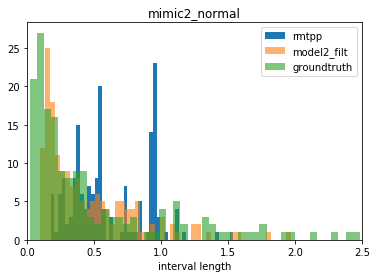

/home/abhishekshar/hierarchichal_point_process/src/preds/mimic2/rmtpp/_g1_do0.5_b32_h256_l20.0_l20_gn10.0_lr0.001_c10_s1_tlintensity_ai40 172
/home/abhishekshar/hierarchichal_point_process/src/preds/mimic2/model2_filt/_g1_do0.5_b32_h256_l20.0_l20_gn10.0_lr0.001_c10_s1_tlintensity_ai40 172


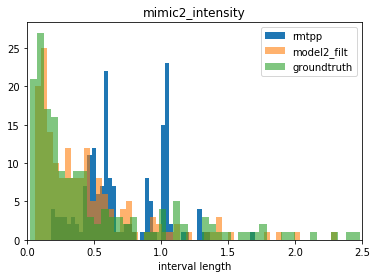

In [37]:
plot_dataset('mimic2')